## <u>**Use the "Text" blocks to provide explanations wherever you find them necessary. Highlight your answers inside these text fields to ensure that we don't miss it while grading your HW.**</u> 

## **Setup**

- Code to download the data directly from the colab notebook.
- If you find it easier to download the data from the kaggle website (and uploading it to your drive), you can skip this section.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
# First mount your drive before running these cells. 
# Create a folder for the this HW and change to that dir
# %cd drive/MyDrive/CSE\ 519\ fall\ 2021/HW2

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
# Create a new API token under "Account" in the kaggle webpage and download the json file
# Upload the file by clicking on the browse 
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"saibvara","key":"6c750bc7b1997c7cb9da7ed2c5b76f9c"}'}

In [ ]:
#!mkdir /root/.kaggle
#!ls -a
#!mv .kaggle/kaggle.json /root/.kaggle

# !rm -r .kaggle/
# !ls -a
# !chmod 600 /root/.kaggle/kaggle.json

# !unzip sample_submission.csv.zip
# !unzip test.csv.zip
# !unzip train.csv.zip
# !rm *.zip
# !ls -a
# !ls -lrt sample_data

In [ ]:
#Removing the files that I copied to colab home directory.
# !ls -a
# !rm sample_submission.csv test.csv train.csv
!ls -a

## **Section 1: Library and Data Imports (Q1)**

- Import your libraries and read the data into a dataframe. Print the head of the dataframe. 

In [3]:
use_cols = ["MachineIdentifier", "SmartScreen", "AVProductsInstalled", "AppVersion", "CountryIdentifier", "Census_OSInstallTypeName", "Wdft_IsGamer",
           "EngineVersion", "AVProductStatesIdentifier", "Census_OSVersion", "Census_TotalPhysicalRAM", "Census_ActivationChannel",
           "RtpStateBitfield", "Census_ProcessorModelIdentifier", "Census_PrimaryDiskTotalCapacity", 
            "Census_InternalPrimaryDiagonalDisplaySizeInInches", "Wdft_RegionIdentifier", "LocaleEnglishNameIdentifier",
           "AvSigVersion", "IeVerIdentifier", "IsProtected", "Census_InternalPrimaryDisplayResolutionVertical", "Census_PrimaryDiskTypeName",
            "Census_OSWUAutoUpdateOptionsName", "Census_OSEdition", "Census_GenuineStateName", "Census_ProcessorCoreCount", 
           "Census_OEMNameIdentifier", "Census_MDC2FormFactor", "Census_FirmwareManufacturerIdentifier", "OsBuildLab", "Census_OSBuildRevision", 
            "Census_OSBuildNumber", "Census_IsPenCapable", "Census_IsTouchEnabled", "Census_IsAlwaysOnAlwaysConnectedCapable", "Census_IsSecureBootEnabled", 
            "Census_SystemVolumeTotalCapacity", "Census_PrimaryDiskTotalCapacity", "HasDetections"
           ]
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float64',
        'AVProductStatesIdentifier':                            'float64',
        'AVProductsInstalled':                                  'float64',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float64',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float64',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float64',
        'Census_OEMModelIdentifier':                            'float64',
        'Census_ProcessorCoreCount':                            'float64',
        'Census_ProcessorManufacturerIdentifier':               'float64',
        'Census_ProcessorModelIdentifier':                      'float64',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float64',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float64',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float64',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float64',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float64',
        'Census_FirmwareVersionIdentifier':                     'float64',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float64'        
        }

In [4]:
len(use_cols),len(dtypes)

(40, 82)

In [6]:
import pandas as pd
import os

In [7]:
fileName ='/Users/sbvaranasi/Documents/Fall21/DataScienceFundamentals/microsoft-malware-prediction/train.csv'
df=pd.read_csv(fileName, usecols=use_cols, dtype=dtypes)

In [8]:
df.head()

,MachineIdentifier,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,AVProductStatesIdentifier,AVProductsInstalled,CountryIdentifier,LocaleEnglishNameIdentifier,OsBuildLab,...,Census_GenuineStateName,Census_ActivationChannel,Census_FirmwareManufacturerIdentifier,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,1.1.15100.1,4.18.1807.18075,1.273.1735.0,7.0,53447.0,1.0,29,-85,17134.1.amd64fre.rs4_release.180410-1804,...,IS_GENUINE,Retail,628.0,0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,1.1.14600.4,4.13.17134.1,1.263.48.0,7.0,53447.0,1.0,93,64,17134.1.amd64fre.rs4_release.180410-1804,...,OFFLINE,Retail,628.0,0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,1.1.15100.1,4.18.1807.18075,1.273.1341.0,7.0,53447.0,1.0,86,49,17134.1.amd64fre.rs4_release.180410-1804,...,IS_GENUINE,OEM:NONSLP,142.0,0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,1.1.15100.1,4.18.1807.18075,1.273.1527.0,7.0,53447.0,1.0,88,115,17134.1.amd64fre.rs4_release.180410-1804,...,IS_GENUINE,OEM:NONSLP,355.0,0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,1.1.15100.1,4.18.1807.18075,1.273.1379.0,7.0,53447.0,1.0,18,75,17134.1.amd64fre.rs4_release.180410-1804,...,IS_GENUINE,Retail,355.0,0,0,0,0.0,0.0,1.0,1


In [9]:
df.shape

(8921483, 39)

## **Section 2: Measure of Power (Q2a & 2b)**

## **Section 3: OS version vs Malware detected (Q3)**

In [ ]:
hists=df.hist() #Yes it is messy

In [9]:
df[['Census_OSBuildNumber', 'Census_OSBuildRevision', 'HasDetections']].sample(15)

,Census_OSBuildNumber,Census_OSBuildRevision,HasDetections
446519,16299,371,1
4491791,17134,285,0
298843,15063,1088,1
6555010,14393,447,0
6305579,14393,2189,1
2207332,17134,191,0
1207032,14393,82,1
677943,16299,431,1
112049,16299,611,0
3959850,16299,371,0


In [11]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
set(df.HasDetections)

{0, 1}

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb84a87210>,
      dtype=object)

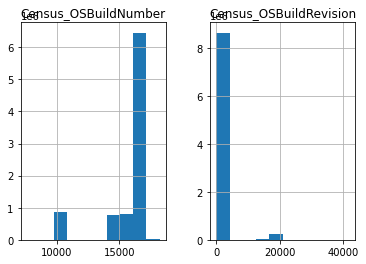

In [12]:
# df['Census_OSBuildNumber'].hist()
df[['Census_OSBuildNumber', 'Census_OSBuildRevision']].hist(bins=10)

In [ ]:
# Data for plotting
plt.plot(df['Census_OSBuildNumber'], df['Census_OSBuildRevision'])

## **Section 4: Effect of Number of AV Products Installed (Q4)**

## **Section 5: Interesting findings (Q5)**

In [13]:
df['HasDetections'].describe()

count    8.921483e+06
mean     4.997927e-01
std      5.000000e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: HasDetections, dtype: float64

In [14]:
df.columns

Index(['MachineIdentifier', 'EngineVersion', 'AppVersion', 'AvSigVersion',
       'RtpStateBitfield', 'AVProductStatesIdentifier', 'AVProductsInstalled',
       'CountryIdentifier', 'LocaleEnglishNameIdentifier', 'OsBuildLab',
       'IsProtected', 'IeVerIdentifier', 'SmartScreen',
       'Census_MDC2FormFactor', 'Census_OEMNameIdentifier',
       'Census_ProcessorCoreCount', 'Census_ProcessorModelIdentifier',
       'Census_PrimaryDiskTotalCapacity', 'Census_PrimaryDiskTypeName',
       'Census_SystemVolumeTotalCapacity', 'Census_TotalPhysicalRAM',
       'Census_InternalPrimaryDiagonalDisplaySizeInInches',
       'Census_InternalPrimaryDisplayResolutionVertical', 'Census_OSVersion',
       'Census_OSBuildNumber', 'Census_OSBuildRevision', 'Census_OSEdition',
       'Census_OSInstallTypeName', 'Census_OSWUAutoUpdateOptionsName',
       'Census_GenuineStateName', 'Census_ActivationChannel',
       'Census_FirmwareManufacturerIdentifier', 'Census_IsSecureBootEnabled',
       'Census_IsT

## **Section 6: Baseline modelling (Q6)**

In [ ]:
#Starting with preprocessing the data
df.columns

In [ ]:
df.isnull().sum()

In [ ]:
# df.SmartScreen.describe()
df.SmartScreen.sample()

In [17]:
df_droppedna = df.dropna(how='any', inplace=False)
print(df_droppedna.shape)

(5430439, 39)


In [18]:
df_droppedna.isnull().sum()

MachineIdentifier                                    0
EngineVersion                                        0
AppVersion                                           0
AvSigVersion                                         0
RtpStateBitfield                                     0
AVProductStatesIdentifier                            0
AVProductsInstalled                                  0
CountryIdentifier                                    0
LocaleEnglishNameIdentifier                          0
OsBuildLab                                           0
IsProtected                                          0
IeVerIdentifier                                      0
SmartScreen                                          0
Census_MDC2FormFactor                                0
Census_OEMNameIdentifier                             0
Census_ProcessorCoreCount                            0
Census_ProcessorModelIdentifier                      0
Census_PrimaryDiskTotalCapacity                      0
Census_Pri

In [19]:
df_droppedna.isna().values.any()

False

In [20]:
# Identifier_Columns = df.columns.apply(lambda object: 'TEDx' in string)
columns_list = list(df_droppedna.columns)
IdentifierColumns = [x for x in columns_list if 'Identifier' in x]

In [21]:
IdentifierColumns.remove('MachineIdentifier')
len(IdentifierColumns)
print(IdentifierColumns)

['AVProductStatesIdentifier', 'CountryIdentifier', 'LocaleEnglishNameIdentifier', 'IeVerIdentifier', 'Census_OEMNameIdentifier', 'Census_ProcessorModelIdentifier', 'Census_FirmwareManufacturerIdentifier', 'Wdft_RegionIdentifier']


In [ ]:
df_droppedna[IdentifierColumns]

In [22]:
BooleanColumns = [x for x in columns_list if 'Is' in x]
print(BooleanColumns), print(len(BooleanColumns))

['IsProtected', 'Census_IsSecureBootEnabled', 'Census_IsTouchEnabled', 'Census_IsPenCapable', 'Census_IsAlwaysOnAlwaysConnectedCapable', 'Wdft_IsGamer']
6


(None, None)

In [17]:
df_droppedna.EngineVersion.describe()

count         5430439
unique             65
top       1.1.15100.1
freq          2345842
Name: EngineVersion, dtype: object

In [24]:
CategoricalColumns = [x for x in list(df_droppedna.columns) if 'Version' in x]
print(len(CategoricalColumns))

4


In [25]:
NumericalColumns = ['AVProductsInstalled','Census_ProcessorCoreCount','Census_PrimaryDiskTotalCapacity',
                     'Census_SystemVolumeTotalCapacity','Census_TotalPhysicalRAM','Census_InternalPrimaryDiagonalDisplaySizeInInches',
                     'Census_InternalPrimaryDisplayResolutionVertical','Census_OSBuildNumber','Census_OSBuildRevision']

In [51]:
df_droppedna[CategoricalColumns]

,EngineVersion,AppVersion,AvSigVersion,Census_OSVersion
2,1.1.15100.1,4.18.1807.18075,1.273.1341.0,10.0.17134.165
3,1.1.15100.1,4.18.1807.18075,1.273.1527.0,10.0.17134.228
4,1.1.15100.1,4.18.1807.18075,1.273.1379.0,10.0.17134.191
5,1.1.15100.1,4.18.1807.18075,1.273.1094.0,10.0.17134.165
7,1.1.15100.1,4.18.1807.18075,1.273.1393.0,10.0.14393.0
...,...,...,...,...
8921475,1.1.15000.2,4.18.1806.18062,1.271.787.0,10.0.16299.192
8921476,1.1.15200.1,4.18.1807.18075,1.275.438.0,10.0.16299.248
8921477,1.1.15100.1,4.18.1807.18075,1.273.1613.0,10.0.15063.1266
8921478,1.1.15100.1,4.18.1807.18075,1.273.1555.0,10.0.16299.431


In [19]:
app_version = df_droppedna.groupby('AppVersion')['AppVersion']
app_counts = app_version.count().sort_values(ascending=False)
app_counts.value_counts()

0        8
1        6
3        3
2        2
4        2
        ..
12626    1
39756    1
7025     1
66906    1
10166    1
Name: AppVersion, Length: 91, dtype: int64

In [20]:
df_droppedna.groupby('Census_OSVersion').count()
#What are these ones in Census_OSVersion?

,MachineIdentifier,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,AVProductStatesIdentifier,AVProductsInstalled,CountryIdentifier,LocaleEnglishNameIdentifier,OsBuildLab,IsProtected,IeVerIdentifier,SmartScreen,Census_MDC2FormFactor,Census_OEMNameIdentifier,Census_ProcessorCoreCount,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionVertical,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSInstallTypeName,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_FirmwareManufacturerIdentifier,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
Census_OSVersion,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10.0.10240.16384,24003,24003,24003,24003,24003,24003,24003,24003,24003,24003,24003,24003,24003,24003,24003,24003,24003,24003,24003,24003,24003,24003,24003,24003,24003,24003,24003,24003,24003,24003,24003,24003,24003,24003,24003,24003,24003,24003
10.0.10240.16397,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648
10.0.10240.16405,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313
10.0.10240.16413,874,874,874,874,874,874,874,874,874,874,874,874,874,874,874,874,874,874,874,874,874,874,874,874,874,874,874,874,874,874,874,874,874,874,874,874,874,874
10.0.10240.16487,3308,3308,3308,3308,3308,3308,3308,3308,3308,3308,3308,3308,3308,3308,3308,3308,3308,3308,3308,3308,3308,3308,3308,3308,3308,3308,3308,3308,3308,3308,3308,3308,3308,3308,3308,3308,3308,3308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10.0.17744.1000,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6.2.9200.21703,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
10.0.14466.228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
os_version = df_droppedna.groupby('Census_OSVersion')['Census_OSVersion']

In [22]:
counts = os_version.count().sort_values(ascending=False)
counts.value_counts()
#Can I drop these 94 ones? 

0        75
1        48
2        25
3        18
4        13
         ..
4913      1
7303      1
19759     1
13102     1
6777      1
Name: Census_OSVersion, Length: 254, dtype: int64

In [23]:
#Computing correlation matrix
corr = df_droppedna.corr()

In [16]:
import seaborn as sns
from matplotlib import pyplot as plt

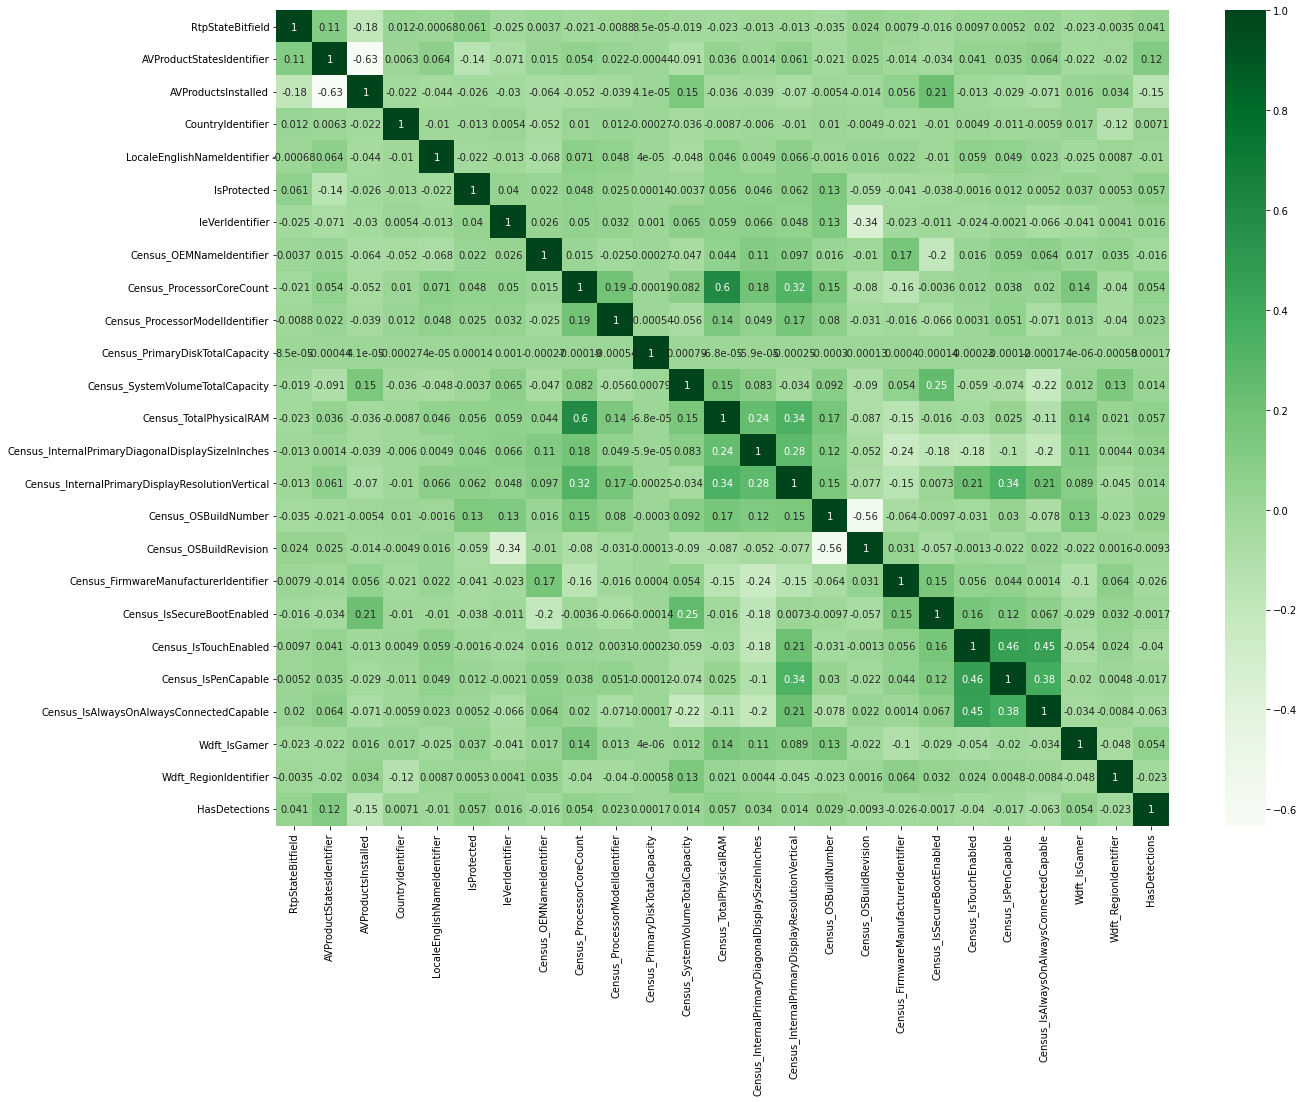

In [15]:
plt.figure(figsize=(20,15))
sns.heatmap(corr, cmap="Greens",annot=True)

In [ ]:
c1 = corr[(corr < 0.3) & (corr > -0.3)].abs().unstack().transpose().sort_values(ascending=True).drop_duplicates() #Picking values that lie between -0.5 and 0.5 from correlation matrix
print(c1)

In [ ]:
c1[50:100]

In [28]:
# Initial_Features = ['Census_PrimaryDiskTotalCapacity', 'Census_SystemVolumeTotalCapacity', 'Census_InternalPrimaryDiagonalDisplaySizeInInches', 'AVProductsInstalled', 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
#                     'Census_TotalPhysicalRAM', 'RtpStateBitfield']
Initial_Features = ['Census_SystemVolumeTotalCapacity', 'Census_InternalPrimaryDiagonalDisplaySizeInInches', 'AVProductsInstalled', 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
                    'Census_TotalPhysicalRAM', 'RtpStateBitfield']

#Ignoring categorical variables because they should be encoded.
Final_Features = set(Initial_Features + IdentifierColumns + BooleanColumns + NumericalColumns)
print(IdentifierColumns)

print(Final_Features)
# print('HasDetections' in Final_Features)
print(len(Final_Features))

['AVProductStatesIdentifier', 'CountryIdentifier', 'LocaleEnglishNameIdentifier', 'IeVerIdentifier', 'Census_OEMNameIdentifier', 'Census_ProcessorModelIdentifier', 'Census_FirmwareManufacturerIdentifier', 'Wdft_RegionIdentifier']
{'AVProductsInstalled', 'Census_ProcessorCoreCount', 'Census_SystemVolumeTotalCapacity', 'AVProductStatesIdentifier', 'CountryIdentifier', 'Census_OEMNameIdentifier', 'Census_PrimaryDiskTotalCapacity', 'Census_IsPenCapable', 'Census_InternalPrimaryDisplayResolutionVertical', 'Census_IsAlwaysOnAlwaysConnectedCapable', 'LocaleEnglishNameIdentifier', 'Census_FirmwareManufacturerIdentifier', 'Census_TotalPhysicalRAM', 'Wdft_RegionIdentifier', 'IsProtected', 'RtpStateBitfield', 'Census_OSBuildNumber', 'Wdft_IsGamer', 'Census_ProcessorModelIdentifier', 'Census_IsTouchEnabled', 'IeVerIdentifier', 'Census_OSBuildRevision', 'Census_IsSecureBootEnabled', 'Census_InternalPrimaryDiagonalDisplaySizeInInches'}
24


In [29]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

#Running logistic regression model without any preprocessing of the data. Only thing that I did is feature selection

In [58]:
X=df_droppedna[Final_Features]
y=df_droppedna['HasDetections']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
# print(X_train.shape), print(X_test.shape), print(y_train.shape)
logreg = LogisticRegression(solver='saga', random_state=0, max_iter=400)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.54


## **Section 7: Feature Cleaning and Additional models (Q7a & 7b)**

# Plan for feature cleaning:


1.   Instead of dropping null values as I did for logistic regression, I will try to compute mean, mode and accordingly replace for numerical, categorical data respectively.
2.   Convert categorical variables(Identifiers) from string -> int by doing some preprocessing. 
3.   Using describe and groupby->counts for each categorical variable I will try to introduce as few one-hot encoding columns as possible and compare the performance.
4.   Normalize numerical values using min-max scaling or standard scaling.





In [30]:
print(CategoricalColumns)
print(IdentifierColumns)
print(BooleanColumns)
print(NumericalColumns)

['EngineVersion', 'AppVersion', 'AvSigVersion', 'Census_OSVersion']
['AVProductStatesIdentifier', 'CountryIdentifier', 'LocaleEnglishNameIdentifier', 'IeVerIdentifier', 'Census_OEMNameIdentifier', 'Census_ProcessorModelIdentifier', 'Census_FirmwareManufacturerIdentifier', 'Wdft_RegionIdentifier']
['IsProtected', 'Census_IsSecureBootEnabled', 'Census_IsTouchEnabled', 'Census_IsPenCapable', 'Census_IsAlwaysOnAlwaysConnectedCapable', 'Wdft_IsGamer']
['AVProductsInstalled', 'Census_ProcessorCoreCount', 'Census_PrimaryDiskTotalCapacity', 'Census_SystemVolumeTotalCapacity', 'Census_TotalPhysicalRAM', 'Census_InternalPrimaryDiagonalDisplaySizeInInches', 'Census_InternalPrimaryDisplayResolutionVertical', 'Census_OSBuildNumber', 'Census_OSBuildRevision']


In [47]:
# df.astype({'IeVerIdentifier': 'float64', 'Census_OEMNameIdentifier': 'float64', 'Census_ProcessorModelIdentifier': 'float64', 'Census_FirmwareManufacturerIdentifier': 'float64', 'Wdft_RegionIdentifier': 'float64'}).dtypes
#Changing datatypes of the above columns to float64 because of overflow

In [31]:
df.head()
df.dtypes

MachineIdentifier                                    category
EngineVersion                                        category
AppVersion                                           category
AvSigVersion                                         category
RtpStateBitfield                                      float16
AVProductStatesIdentifier                             float64
AVProductsInstalled                                   float16
CountryIdentifier                                       int16
LocaleEnglishNameIdentifier                              int8
OsBuildLab                                           category
IsProtected                                           float16
IeVerIdentifier                                       float64
SmartScreen                                          category
Census_MDC2FormFactor                                category
Census_OEMNameIdentifier                              float64
Census_ProcessorCoreCount                             float16
Census_P

In [32]:
print(df.AVProductStatesIdentifier.describe())
print(df.IeVerIdentifier.describe())
# print(df.Census_ProcessorModelIdentifier.describe())

print(df.IeVerIdentifier.sample(10), df.IeVerIdentifier.mean(skipna=True))

count    8.885262e+06
mean     4.784001e+04
std      1.403237e+04
min      3.000000e+00
25%      4.948000e+04
50%      5.344700e+04
75%      5.344700e+04
max      7.050700e+04
Name: AVProductStatesIdentifier, dtype: float64
count    8.862589e+06
mean     1.265760e+02
std      4.267778e+01
min      1.000000e+00
25%      1.110000e+02
50%      1.170000e+02
75%      1.370000e+02
max      4.290000e+02
Name: IeVerIdentifier, dtype: float64
5871315    137.0
1923070    107.0
6877507     53.0
8336595    117.0
2443424    137.0
3428924     98.0
2973112    105.0
412196     117.0
4526143    117.0
8676242    323.0
Name: IeVerIdentifier, dtype: float64 126.5760229883164


In [35]:
# Filling nan values in the original dataframe df with mean.
for item in IdentifierColumns:
    df[item].fillna(value = df[item].mean(), inplace = True)
    
for item in NumericalColumns:
    df[item].fillna(value = df[item].mean(), inplace = True)
    
for item in CategoricalColumns:
    df[item].fillna(value = df[item].mode(), inplace = True)

#Filling nan values in the original dataframe df with mode.
for item in BooleanColumns:
    df[item].fillna(value = df[item].mode(), inplace = True)

In [36]:
df.isnull().sum()

MachineIdentifier                                          0
EngineVersion                                              0
AppVersion                                                 0
AvSigVersion                                               0
RtpStateBitfield                                       32318
AVProductStatesIdentifier                                  0
AVProductsInstalled                                    36221
CountryIdentifier                                          0
LocaleEnglishNameIdentifier                                0
OsBuildLab                                                21
IsProtected                                            36044
IeVerIdentifier                                            0
SmartScreen                                          3177011
Census_MDC2FormFactor                                      0
Census_OEMNameIdentifier                                   0
Census_ProcessorCoreCount                              41306
Census_ProcessorModelIde

In [72]:
df.EngineVersion.describe()
# df.AppVersion.describe()
# df_droppedna.AvSigVersion.describe()
# df.Census_OSVersion.describe()

count         8921483
unique             70
top       1.1.15200.1
freq          3845067
Name: EngineVersion, dtype: object

In [26]:
unique_engine = df.EngineVersion.unique()
unique_app = df.AppVersion.unique()
unique_av_sig = df.AvSigVersion.unique()
unique_census_os = df.Census_OSVersion.unique()

engine_dict = dict(zip(unique_engine, range(len(unique_engine))))
# print(engine_dict), print(len(engine_dict))
app_dict = dict(zip(unique_app, range(len(unique_app))))
av_sig_dict = dict(zip(unique_av_sig, range(len(unique_av_sig))))
census_os_dict = dict(zip(unique_census_os, range(len(unique_census_os))))

# print(engine_dict)
# print(len(app_dict)), print(app_dict)
# print(len(av_sig_dict))
# print(len(census_os_dict))


In [27]:
temp=df.copy(deep = False)
temp['EngineVersion'] = df['EngineVersion'].map(engine_dict)
temp['AppVersion'] = df['AppVersion'].map(app_dict)
temp['AvSigVersion'] = df['AvSigVersion'].map(av_sig_dict)
temp['Census_OSVersion'] = df['Census_OSVersion'].map(census_os_dict)

# temp['EngineVersion'] = df_droppedna['EngineVersion'].apply(lambda x : engine_dict[x])
# temp['AppVersion'] = df_droppedna['AppVersion'].apply(lambda x : app_dict[x])
# temp['AvSigVersion'] = df_droppedna['AvSigVersion'].apply(lambda x : av_sig_dict[x])
# temp['Census_OSVersion'] = df_droppedna['Census_OSVersion'].apply(lambda x : census_os_dict[x])

# temp['EngineVersion'].sample(50)
temp[CategoricalColumns].describe()

,EngineVersion,AppVersion,AvSigVersion,Census_OSVersion
count,8921483,8921483,8921483,8921483
unique,70,110,8531,469
top,2,0,85,2
freq,3845067,5139224,102317,1413627


In [30]:
Final_Features_1 = Final_Features + CategoricalColumns
print(Final_Features_1,  len(Final_Features_1))

['Census_SystemVolumeTotalCapacity', 'Census_InternalPrimaryDiagonalDisplaySizeInInches', 'AVProductsInstalled', 'Census_InternalPrimaryDiagonalDisplaySizeInInches', 'Census_TotalPhysicalRAM', 'RtpStateBitfield', 'AVProductStatesIdentifier', 'CountryIdentifier', 'LocaleEnglishNameIdentifier', 'IeVerIdentifier', 'Census_OEMNameIdentifier', 'Census_ProcessorModelIdentifier', 'Census_FirmwareManufacturerIdentifier', 'Wdft_RegionIdentifier', 'IsProtected', 'Census_IsSecureBootEnabled', 'Census_IsTouchEnabled', 'Census_IsPenCapable', 'Census_IsAlwaysOnAlwaysConnectedCapable', 'Wdft_IsGamer', 'EngineVersion', 'AppVersion', 'AvSigVersion', 'Census_OSVersion'] 24


In [31]:
X=temp[Final_Features_1]
y=temp['HasDetections']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
# print(X_train.shape), print(X_test.shape), print(y_train.shape)
logreg = LogisticRegression(solver='saga', random_state=0, max_iter=400)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

ValueError: ignored

## **Section 8: Screenshots (Q8)** 

Public Score: 

Private Score:

Kaggle profile link:

Screenshot(s):